# Determine Winning Nation: Deep Learning Neural Network

In [1]:
# Dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from tensorflow.keras.utils import to_categorical

In [2]:
#import csv
df = pd.read_csv('data/nations_final.csv')
print(df.shape)
df.head()

(1309, 23)


NOC     Region        Games  Year  GDP (Avg)  Athletes  Sports  Events  \
0  ALG    Algeria  1964 Summer  1964   1248.867         1       1       7   
1  AUS  Australia  1964 Summer  1964    974.262       215      19     127   
2  AUT    Austria  1964 Summer  1964   1797.164        56      14      54   
3  BEL    Belgium  1964 Summer  1964   2036.678        60      13      36   
4  BOL     Boliva  1964 Summer  1964   1828.360         1       1       1   

   Athletes per Event  Median Competitor Age  ...  Summer  Home_Field Adv  \
0               0.143                   26.0  ...       1               0   
1               1.693                   24.0  ...       1               0   
2               1.037                   24.0  ...       1               0   
3               1.667                   24.5  ...       1               0   
4               1.000                   34.0  ...       1               0   

   Medaled  Total Medals  Gold  Silver  Bronze  % Medal Bronze  \
0        0             0     0       0       0           0.000   
1        1            37     8       3      26           0.703   
2        0             0     0       0       0           0.000   
3        1             3     2       0       1           0.333   
4        0             0     0       0       0           0.000   

   % Medal Silver  % Medal Gold  
0           0.000         0.000  
1           0.081         0.216  
2           0.000         0.000  
3           0.000         0.667  
4           0.000         0.000  

[5 rows x 23 columns]

In [3]:
df.nunique()

NOC                           78
Region                        78
Games                         28
Year                          20
GDP (Avg)                   1299
Athletes                     280
Sports                        34
Events                       195
Athletes per Event           605
Median Competitor Age         43
Median Competitor Height      62
Median Competitor Weight      84
M/F                            2
Summer                         2
Home_Field Adv                 2
Medaled                        2
Total Medals                 117
Gold                          65
Silver                        62
Bronze                        63
% Medal Bronze               241
% Medal Silver               252
% Medal Gold                 239
dtype: int64

<AxesSubplot:ylabel='Density'>

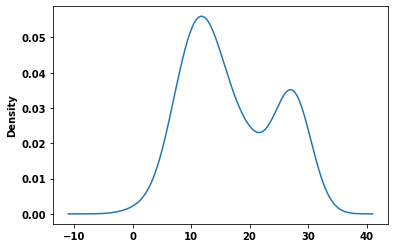

In [11]:
NOC_count = df['NOC'].value_counts()
NOC_count.plot.density()

In [14]:
medals = df.groupby(['NOC', 'Region'])[['Total Medals', 'Gold', 'Silver', 'Bronze']].sum()
medals = medals.sort_values(by="Total Medals", ascending=False).reset_index()
medals.head(25)

NOC          Region  Total Medals  Gold  Silver  Bronze
0   USA             USA          3480  1615    1037     828
1   GER         Germany          1391   488     417     486
2   AUS       Australia          1111   286     382     443
3   CHN           China           985   350     345     290
4   CAN          Canada           932   319     305     308
5   ITA           Italy           907   247     317     343
6   GBR              UK           841   264     281     296
7   FRA          France           831   247     252     332
8   JPN           Japan           775   210     243     322
9   NED     Netherlands           691   213     247     231
10  HUN         Hungary           635   237     190     208
11  SWE          Sweden           618   148     258     212
12  ROU         Romania           569   147     181     241
13  KOR     South Korea           560   190     199     171
14  NOR          Norway           488   164     172     152
15  POL          Poland           449   105     155     189
16  BRA          Brazil           434   105     168     161
17  FIN         Finland           428    63     135     230
18  ESP           Spain           414    83     212     119
19  CUB            Cuba           393   155     123     115
20  TCH  Czech Republic           331    42     156     133
21  BUL        Bulgaria           314    52     136     126
22  SUI     Switzerland           314    75     112     127
23  AUT         Austria           261    71      95      95
24  EUN          Russia           230   104      64      62

In [23]:
total_medal_count = df['Total Medals'].sum()
medals['% Medals Won'] = (medals["Total Medals"]/total_medal_count * 100).round(3)
top_nations = medals.sort_values(by="% Medals Won", ascending=False)
print(f"Top 20 Medaling Nations: Percentage of All Medals Won")
print(f"{round(sum(medals['% Medals Won'].head(20)),3)} %")
top_nations.head(20)

Top 20 Medaling Nations: Percentage of All Medals Won
86.154 %


NOC       Region  Total Medals  Gold  Silver  Bronze  % Medals Won
0   USA          USA          3480  1615    1037     828        17.707
1   GER      Germany          1391   488     417     486         7.078
2   AUS    Australia          1111   286     382     443         5.653
3   CHN        China           985   350     345     290         5.012
4   CAN       Canada           932   319     305     308         4.742
5   ITA        Italy           907   247     317     343         4.615
6   GBR           UK           841   264     281     296         4.279
7   FRA       France           831   247     252     332         4.228
8   JPN        Japan           775   210     243     322         3.943
9   NED  Netherlands           691   213     247     231         3.516
10  HUN      Hungary           635   237     190     208         3.231
11  SWE       Sweden           618   148     258     212         3.145
12  ROU      Romania           569   147     181     241         2.895
13  KOR  South Korea           560   190     199     171         2.849
14  NOR       Norway           488   164     172     152         2.483
15  POL       Poland           449   105     155     189         2.285
16  BRA       Brazil           434   105     168     161         2.208
17  FIN      Finland           428    63     135     230         2.178
18  ESP        Spain           414    83     212     119         2.107
19  CUB         Cuba           393   155     123     115         2.000

In [36]:
# Worst Nations
worst_nations = top_nations[top_nations["% Medals Won"]<1]
worst_nations.head(20)

NOC        Region  Total Medals  Gold  Silver  Bronze  % Medals Won
26  CRO       Croatia           139    53      50      36         0.707
27  KEN         Kenya           100    34      39      27         0.509
28  NGR       Nigeria            96    22      30      44         0.488
29  PAK      Pakistan            83    29      31      23         0.422
31  MEX        Mexico            75    24      22      29         0.382
30  IND         India            75    32       4      39         0.382
32  BEL       Belgium            74    10      36      28         0.377
33  RSA  South Africa            54    15      18      21         0.275
34  ETH      Ethiopia            52    21       9      22         0.265
35  IRI          Iran            51    16      15      20         0.260
36  GRE        Greece            39    13      12      14         0.198
37  INA     Indonesia            38    10      17      11         0.193
38  EST       Estonia            25     7       6      12         0.127
40  CHI         Chile            22     3       2      17         0.112
39  MAR       Morocco            22     6       4      12         0.112
41  POR      Portugal            19     4       7       8         0.097
42  PAR      Paraguay            17     0      17       0         0.087
43  ALG       Algeria            15     5       4       6         0.076
44  PER          Peru            14     0      14       0         0.071
45  EGY         Egypt            12     1       4       7         0.061

In [39]:
# Reduce number of unique naiton classifiers to 21 - 78 to 27
replace_noc = list(worst_nations['NOC'].unique())

# Create a copy of the dataframe for iterable purposes
df2 = df.copy()

# Replace Nation in dataframe
for noc in replace_noc:
    df2['NOC'] = df2['NOC'].replace(noc, "Other")

# Check to make sure binning was successful
print(len(df2.NOC.value_counts()))
df2.NOC.value_counts()

27


Other    677
FIN       28
SUI       28
GBR       28
ITA       28
ROU       28
AUT       28
ESP       28
FRA       28
SWE       28
NED       28
AUS       27
USA       27
KOR       27
NOR       27
HUN       27
BUL       27
POL       27
CAN       27
JPN       27
NZL       25
BRA       20
CHN       19
GER       16
TCH       15
CUB       12
EUN        2
Name: NOC, dtype: int64

In [40]:
df.columns

Index(['NOC', 'Region', 'Games', 'Year', 'GDP (Avg)', 'Athletes', 'Sports',
       'Events', 'Athletes per Event', 'Median Competitor Age',
       'Median Competitor Height', 'Median Competitor Weight', 'M/F', 'Summer',
       'Home_Field Adv', 'Medaled', 'Total Medals', 'Gold', 'Silver', 'Bronze',
       '% Medal Bronze', '% Medal Silver', '% Medal Gold'],
      dtype='object')

In [41]:
df.dtypes

NOC                          object
Region                       object
Games                        object
Year                          int64
GDP (Avg)                   float64
Athletes                      int64
Sports                        int64
Events                        int64
Athletes per Event          float64
Median Competitor Age       float64
Median Competitor Height    float64
Median Competitor Weight    float64
M/F                           int64
Summer                        int64
Home_Field Adv                int64
Medaled                       int64
Total Medals                  int64
Gold                          int64
Silver                        int64
Bronze                        int64
% Medal Bronze              float64
% Medal Silver              float64
% Medal Gold                float64
dtype: object

In [42]:
# Set features for model
drop_features = ['NOC','Region','Games', 'Medaled', '% Medal Bronze', '% Medal Silver', '% Medal Gold']
X = df2
X = X.drop(drop_features, axis=1)
y = df2['NOC']
print(X.shape, y.shape)

(1309, 16) (1309,)


In [43]:
# Split data into training and testing groups and scale data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
X_scaler = RobustScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Step (1): Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step (2): Convert encoded labels using to_categorical()
y_train_cat = to_categorical(encoded_y_train, 27)
y_test_cat = to_categorical(encoded_y_test, 27)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 50

# Define the model
nn= Sequential()

# First hidden layer
nn.add(Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(Dense(units=27, activation="softmax"))


In [48]:
# summarize the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                850       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 27)                1377      
Total params: 7,327
Trainable params: 7,327
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Compile and fit the model
nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Fit the model to the training data
nn.fit(X_train_scaled, y_train_cat, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
31/31 - 2s - loss: 3.0161 - accuracy: 0.3904
Epoch 2/100
31/31 - 0s - loss: 2.2420 - accuracy: 0.5362
Epoch 3/100
31/31 - 0s - loss: 1.9131 - accuracy: 0.5515
Epoch 4/100
31/31 - 0s - loss: 1.7712 - accuracy: 0.5586
Epoch 5/100
31/31 - 0s - loss: 1.6773 - accuracy: 0.5566
Epoch 6/100
31/31 - 0s - loss: 1.6064 - accuracy: 0.5749
Epoch 7/100
31/31 - 0s - loss: 1.5448 - accuracy: 0.5851
Epoch 8/100
31/31 - 0s - loss: 1.4828 - accuracy: 0.5994
Epoch 9/100
31/31 - 0s - loss: 1.4302 - accuracy: 0.6086
Epoch 10/100
31/31 - 0s - loss: 1.3665 - accuracy: 0.6147
Epoch 11/100
31/31 - 0s - loss: 1.3121 - accuracy: 0.6116
Epoch 12/100
31/31 - 0s - loss: 1.2686 - accuracy: 0.6239
Epoch 13/100
31/31 - 0s - loss: 1.2126 - accuracy: 0.6473
Epoch 14/100
31/31 - 0s - loss: 1.1749 - accuracy: 0.6514
Epoch 15/100
31/31 - 0s - loss: 1.1384 - accuracy: 0.6463
Epoch 16/100
31/31 - 0s - loss: 1.1049 - accuracy: 0.6697
Epoch 17/100
31/31 - 0s - loss: 1.0682 - accuracy: 0.6697
Epoch 18/100
31/31 - 0s

In [50]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test_cat, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

11/11 - 0s - loss: 2.1890 - accuracy: 0.6220
Deep Neural Network - Loss: 2.1889843940734863, Accuracy: 0.6219512224197388


In [51]:
prediction = np.argmax(nn.predict(X_test_scaled), axis = -1)
predicted_labels = label_encoder.inverse_transform(prediction)
print(f"Predicted Labels: {predicted_labels[:10]}")
print(f"Actual Labels: {list(y_test[:10])}")

Predicted Labels: ['Other' 'Other' 'CAN' 'HUN' 'Other' 'NED' 'SUI' 'Other' 'SUI' 'ESP']
Actual Labels: ['ESP', 'Other', 'FRA', 'ROU', 'Other', 'NED', 'FIN', 'Other', 'SUI', 'BUL']
